# Restaurant Sales Data Cleaning & EDA (Kaggle)

This notebook is a direct conversion of your finished script into an `.ipynb` notebook.

**Important:** The code blocks below are kept **exactly the same** as your original code (no edits).  
Markdown cells are added only to explain what each section is doing.


## 1) Imports & setup
We import libraries and enable inline plotting.

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import kagglehub
import os
%matplotlib inline

## 2) Download dataset & load CSV
Download the dataset from Kaggle via `kagglehub`, build the file path with `os.path.join`, and read into a DataFrame.

In [2]:
path = kagglehub.dataset_download("ahmedmohamed2003/restaurant-sales-dirty-data-for-cleaning-training")
file_path = os.path.join(path, 'restaurant_sales_data.csv')
df = pd.read_csv(file_path)
df

100%|██████████| 231k/231k [00:00<00:00, 2.69MB/s]

Extracting files...


,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,NaN,NaN,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
...,...,...,...,...,...,...,...,...,...
17529,ORD_320102,CUST_021,Drinks,NaN,NaN,4.0,4.0,2023-12-23,Cash
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet
17532,ORD_612647,CUST_073,Side Dishes,Mashed Potatoes,4.0,2.0,8.0,2022-01-27,Digital Wallet


## 3) Standardize column names
Strip whitespace, lowercase names, and replace spaces with dashes so columns are consistent to reference.

In [3]:
print(df.columns.tolist())
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '-')
print(df.columns.to_list())

['Order ID', 'Customer ID', 'Category', 'Item', 'Price', 'Quantity', 'Order Total', 'Order Date', 'Payment Method']
['order-id', 'customer-id', 'category', 'item', 'price', 'quantity', 'order-total', 'order-date', 'payment-method']


## 4) Parse dates
Convert `order-date` to a real datetime type so we can group by month and do time-based analysis.

In [4]:
df['order-date'].dtype
df['order-date'] = pd.to_datetime(df['order-date'], errors='coerce')
df['order-date'].dtype

dtype('<M8[ns]')

## 5) Audit missing values
Count missing values per column to see where cleaning is needed.

In [5]:
df.isna().sum()

order-id             0
customer-id          0
category             0
item              1758
price              876
quantity           430
order-total        430
order-date           0
payment-method    1082
dtype: int64

## 6) Check duplicates
Count exact duplicate rows (useful sanity check).

In [6]:
print(df.duplicated().sum())

0


## 7) Row-level missingness
Create `missing_count` = how many NaNs each row has, to decide which rows are too broken to keep.

In [7]:
df['missing_count'] = df.isna().sum(axis=1)
df.head(10)

,order-id,customer-id,category,item,price,quantity,order-total,order-date,payment-method,missing_count
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card,0
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet,0
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card,0
3,ORD_630508,CUST_075,Drinks,NaN,NaN,2.0,5.0,2022-08-09,Credit Card,2
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash,0
5,ORD_381680,CUST_031,Main Dishes,Salmon,18.0,5.0,90.0,2022-07-20,Digital Wallet,0
6,ORD_270994,CUST_071,Side Dishes,Garlic Bread,4.0,5.0,20.0,2022-08-19,Credit Card,0
7,ORD_146656,CUST_077,Main Dishes,NaN,15.0,3.0,45.0,2023-02-15,Cash,1
8,ORD_428611,CUST_083,Desserts,NaN,6.0,2.0,12.0,2023-12-16,Cash,1
9,ORD_743636,CUST_085,Main Dishes,Vegetarian Platter,14.0,5.0,70.0,2022-08-07,NaN,1


## 8) Inspect missingness distribution
See how many rows have 0, 1, 2, 3+ missing values.

In [8]:
df['missing_count'].value_counts(ascending=False)

missing_count
0    15252
1     1123
2      593
4      291
5      139
3      136
Name: count, dtype: int64

## 9) Drop heavily-missing rows
Keep rows with fewer than 3 missing fields (triage), then `.copy()` to avoid chained-assignment warnings.

In [9]:
df = df[df['missing_count'] < 3]
df = df.copy()

## 8) Inspect missingness distribution
See how many rows have 0, 1, 2, 3+ missing values.

In [10]:
df['missing_count'].value_counts(ascending=False)

missing_count
0    15252
1     1123
2      593
Name: count, dtype: int64

## Code
(Original code block)

In [11]:
df['payment-method'].mode()

0    Cash
Name: payment-method, dtype: object

## 10) Fill missing payment methods
Fill missing `payment-method` using the most frequent value (mode).

In [12]:
df['payment-method'] = df['payment-method'].fillna(df['payment-method'].mode()[0])
df.isna().sum()

order-id             0
customer-id          0
category             0
item              1192
price              310
quantity             0
order-total          0
order-date           0
payment-method       0
missing_count        0
dtype: int64

## 11) Fill missing prices (derived)
Fill missing `price` using `order-total / quantity` where possible.

In [13]:
df['price'] = df['price'].fillna(df['order-total'] / df['quantity'])
df = df.copy()
df

,order-id,customer-id,category,item,price,quantity,order-total,order-date,payment-method,missing_count
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card,0
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet,0
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card,0
3,ORD_630508,CUST_075,Drinks,NaN,2.5,2.0,5.0,2022-08-09,Credit Card,2
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash,0
...,...,...,...,...,...,...,...,...,...,...
17529,ORD_320102,CUST_021,Drinks,NaN,1.0,4.0,4.0,2023-12-23,Cash,2
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash,0
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet,0
17532,ORD_612647,CUST_073,Side Dishes,Mashed Potatoes,4.0,2.0,8.0,2022-01-27,Digital Wallet,0


## 5) Audit missing values
Count missing values per column to see where cleaning is needed.

In [14]:
df.isna().sum()

order-id             0
customer-id          0
category             0
item              1192
price                0
quantity             0
order-total          0
order-date           0
payment-method       0
missing_count        0
dtype: int64

## 12) Inspect most common item per category
Compute the mode item within each category (useful for group-aware filling).

In [15]:
df.groupby('category')['item'].apply(lambda x: x.mode().iloc[0])

category
Desserts           Ice Cream
Drinks                 Water
Main Dishes    Pasta Alfredo
Side Dishes       Side Salad
Starters        French Fries
Name: item, dtype: object

## 13) Fill missing items by category
Within each category group, fill missing `item` values with that category's most common item.

In [16]:
df['item'] = df.groupby('category')['item'].transform(lambda x: x.fillna(x.mode()[0]))

## 5) Audit missing values
Count missing values per column to see where cleaning is needed.

In [17]:
df.isna().sum()

order-id          0
customer-id       0
category          0
item              0
price             0
quantity          0
order-total       0
order-date        0
payment-method    0
missing_count     0
dtype: int64

## 14) Remove helper column
Drop `missing_count` once it has served its purpose.

In [18]:
df.drop(columns='missing_count', axis=1, inplace=True)

## 15) Fix data types
Cast `quantity` to integer.

In [19]:
df = df.astype({
    'quantity': 'int64'
})

## 16) Dataset shape
Confirm the final row/column count after cleaning.

In [20]:
df.shape

(16968, 9)

## 17) Summary statistics
Get numeric summary stats for cleaned numeric columns.

In [21]:
df.describe(exclude=['datetime', 'O'])

,price,quantity,order-total
count,16968.000000,16968.000000,16968.000000
mean,6.586310,3.014203,19.900312
std,4.837675,1.414788,18.703046
min,1.000000,1.000000,1.000000
25%,3.000000,2.000000,7.500000
50%,5.000000,3.000000,15.000000
75%,7.000000,4.000000,25.000000
max,20.000000,5.000000,100.000000


## 18) Category volume
Count orders per category (how often each category appears).

In [22]:
category_volume = df['category'].value_counts().sort_values(ascending=False)
category_volume

category
Main Dishes    3431
Starters       3418
Drinks         3374
Desserts       3374
Side Dishes    3371
Name: count, dtype: int64

## 19) Category summary table
Build a table with both revenue and quantity per category (for clustered/side-by-side bars).

In [23]:
category_summary = df.groupby('category').agg(
    revenue=('order-total', 'sum'),
    quantity=('quantity', 'sum')
)
category_summary

,revenue,quantity
category,,
Desserts,56403.0,10152
Drinks,22419.5,10169
Main Dishes,159015.0,10455
Side Dishes,40312.0,10099
Starters,59519.0,10270


## Code
(Original code block)

In [24]:
df['payment-method'].value_counts()

payment-method
Cash              6219
Credit Card       5406
Digital Wallet    5343
Name: count, dtype: int64

## 20) Total revenue
Compute total revenue across all orders.

In [25]:
print(df['order-total'].sum())

337668.5


## 21) Revenue by category
Compute revenue per category for ranking and plotting.

In [26]:
category_revenue = df.groupby('category')['order-total'].sum().sort_values(ascending=False)
category_revenue

category
Main Dishes    159015.0
Starters        59519.0
Desserts        56403.0
Side Dishes     40312.0
Drinks          22419.5
Name: order-total, dtype: float64

## 22) Top items
Compute top items by quantity.

In [27]:
menu_items = df.groupby('item')['quantity'].sum().head(10).sort_values(ascending=False)
menu_items

item
French Fries      3307
Chocolate Cake    2348
Coca Cola         2282
Cheese Fries      2061
Cheesecake        1463
Beef Chili        1455
Brownie           1356
Fruit Salad       1353
Chicken Melt      1330
Garlic Bread      1227
Name: quantity, dtype: int64

## 23) Monthly revenue series
Group revenue by year-month for time trend plotting.

In [28]:
monthly_revenue = df.groupby(df['order-date'].dt.to_period('M'))['order-total'].sum().sort_index()
monthly_revenue

order-date
2022-01    14364.5
2022-02    12631.5
2022-03    15691.0
2022-04    14783.0
2022-05    14011.0
2022-06    15042.0
2022-07    14559.0
2022-08    14671.0
2022-09    13398.0
2022-10    15752.0
2022-11    14226.5
2022-12    13324.5
2023-01    13325.0
2023-02    12396.5
2023-03    14714.0
2023-04    14285.0
2023-05    15387.0
2023-06    13561.5
2023-07    14042.0
2023-08    14658.0
2023-09    13172.5
2023-10    13218.5
2023-11    12763.0
2023-12    13691.5
Freq: M, Name: order-total, dtype: float64

## 24) Plots
Use pandas plotting methods to visualize trends and comparisons.

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='Date', ylabel='Revenue'>

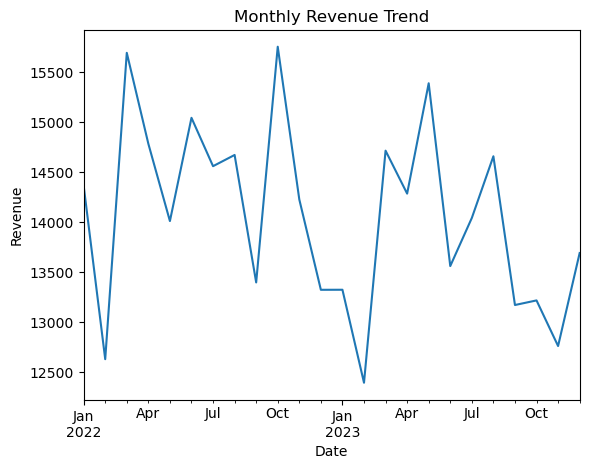

In [29]:
monthly_revenue.plot(
    kind='line', 
    title='Monthly Revenue Trend',
    xlabel='Date',
    ylabel='Revenue')

<Axes: title={'center': 'Cumalative Revenue Over Time'}, xlabel='Date', ylabel='Revenue'>

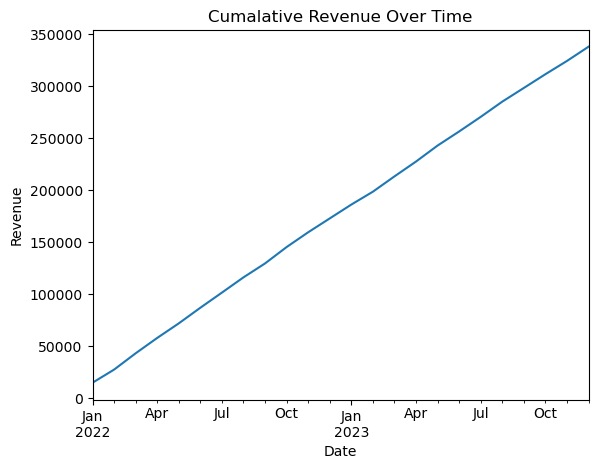

In [30]:
monthly_revenue.cumsum().plot(
    kind='line', 
    title='Cumalative Revenue Over Time',
    xlabel='Date',
    ylabel='Revenue')

## 21) Revenue by category
Compute revenue per category for ranking and plotting.

<Axes: title={'center': 'Revenue by Category'}, xlabel='category'>

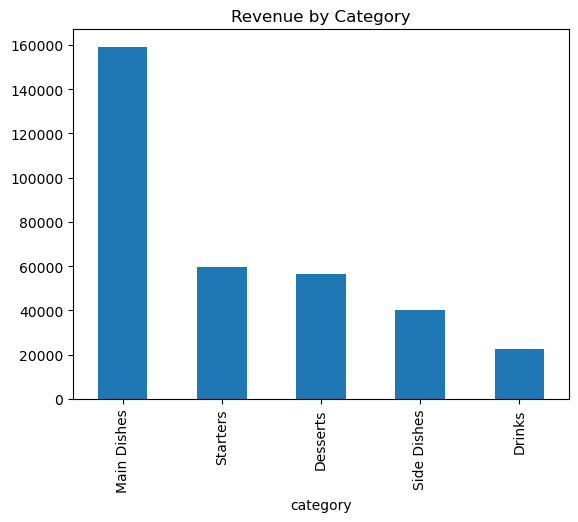

In [31]:
category_revenue.plot(
    kind='bar',
    title='Revenue by Category'
)

## 18) Category volume
Count orders per category (how often each category appears).

<Axes: title={'center': 'Number of Order by Category'}, xlabel='category'>

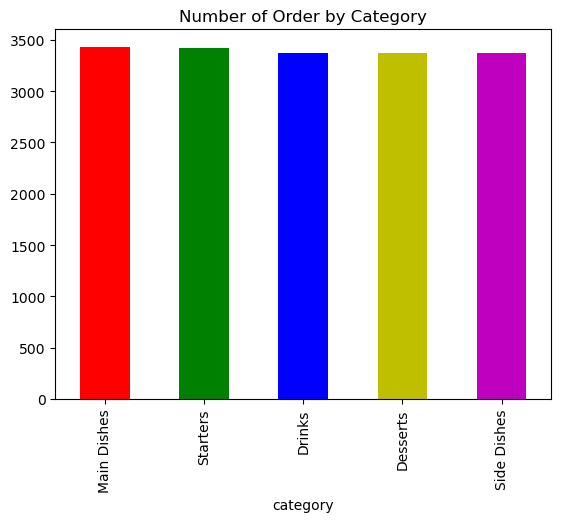

In [32]:
category_volume.plot(
    kind='bar',
    title='Number of Order by Category',
    color=['r', 'g', 'b', 'y', 'm']
)

## 24) Plots
Use pandas plotting methods to visualize trends and comparisons.

<Axes: title={'center': 'Revenue by Payment Method'}, ylabel='payment-method'>

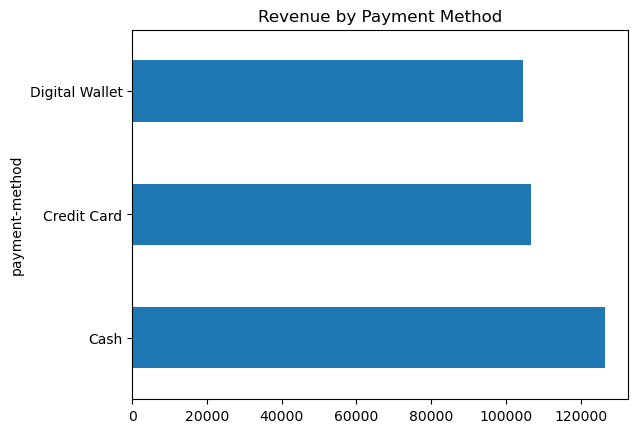

In [33]:
df.groupby('payment-method')['order-total'].sum().sort_values(ascending=False).plot(
    kind='barh',
    title='Revenue by Payment Method'
)

## 19) Category summary table
Build a table with both revenue and quantity per category (for clustered/side-by-side bars).

<Axes: title={'center': 'Revenue vs Quantity by Category'}, xlabel='category'>

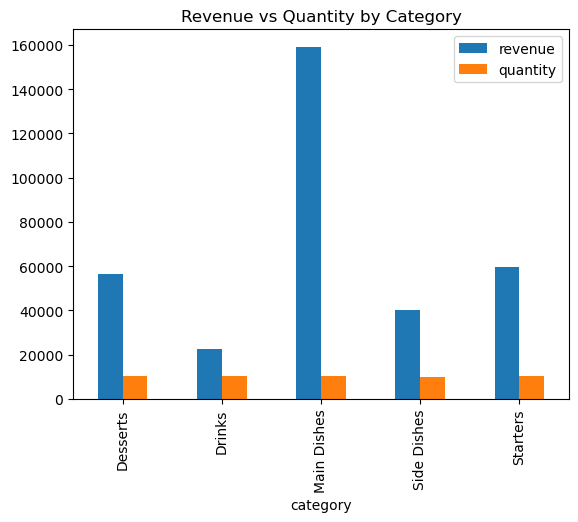

In [34]:
category_summary.plot(
    kind='bar',
    title='Revenue vs Quantity by Category'
)

## 24) Plots
Use pandas plotting methods to visualize trends and comparisons.

<Axes: title={'center': 'Price Distributions'}, ylabel='Frequency'>

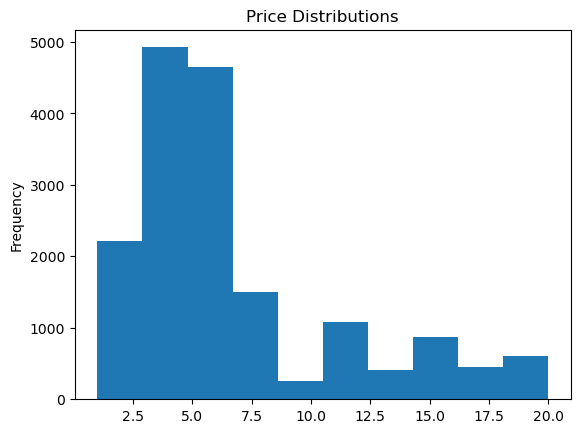

In [35]:
df['price'].plot(
    kind='hist',
    bins=10,
    title='Price Distributions'
)

<Axes: title={'center': 'price'}, xlabel='Category', ylabel='Price'>

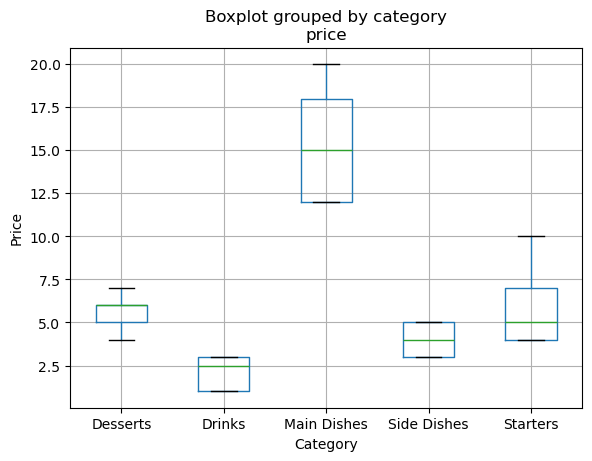

In [36]:
df.boxplot(
    column='price',
    by='category',
    xlabel='Category',
    ylabel='Price'
)